Kolmogorov-Arnold Networks, Introduction
===
Next to MLP in AI, MLT, Multi-Layer Perceptrons ($N(x)$), are fully connected feed-forward neural networks:
$$

$$ N(x) = \sum_i \alpha_i \sigma(\mathbf{W_i}\cdot x + \mathbf{b_i})$$


where networks consist of at least three layers of nodes/neurons:
- Input layer
- Hidden layer(s)
- Output layer

`Kolmogrov-Arnold Theorem`  states that every multivariate continuous function can be represented by the summation of continuous univariable functions:

$$f(\mathbf{x})=f(x^i)=\sum_{q=1}^{2n+1}\Phi_q\left(  \sum_{p=1}^{n}\phi_{q,p}(x_p)  \right)$$

where:

1. $f(x)$ is a multivariate continuous function,
2. $x(n)$ are the input variables of this function,
3. ${\phi_{q,p}}$ and $\mathbf{\Phi}_q$ are univariate functions that transform each input variable.

Multi-layer KANs consist of —

- Input layer
- Edges (where most computation is performed)
- Nodes



In [ ]:
!pip install -q webp

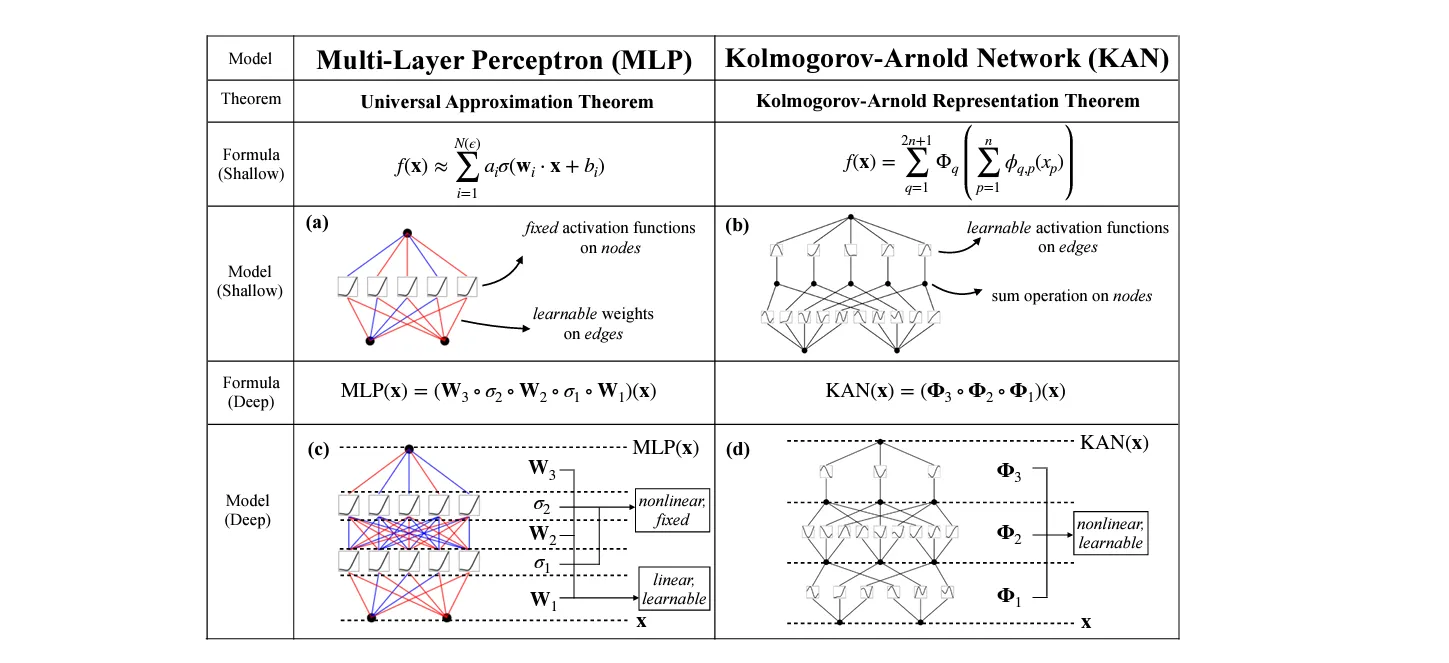

In [9]:
import webp
webp.load_image('data/kan.webp', 'RGBA'!pip install -q webp)


In [11]:
!pip install  pykan

In [10]:
!pip install -U torch

In [4]:
from kan import *
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
import torch
import numpy as np

In [5]:
dataset = {}
train_input, train_label = make_moons(n_samples=10000, shuffle=True, noise=0.1, random_state=None)
test_input, test_label = make_moons(n_samples=10000, shuffle=True, noise=0.1, random_state=None)

dataset['train_input'] = torch.from_numpy(train_input)
dataset['test_input'] = torch.from_numpy(test_input)
dataset['train_label'] = torch.from_numpy(train_label)
dataset['test_label'] = torch.from_numpy(test_label)


In [11]:
model = KAN(width=[2,2], grid=3, k=3) #KAN with two input and 2 output neurons


In [7]:
def train_accuracy():
    return torch.mean((torch.argmax(model(dataset['train_input']), dim=1) == dataset['train_label']).float())

def test_accuracy():
    return torch.mean((torch.argmax(model(dataset['test_input']), dim=1) == dataset['test_label']).float())

results = model.train(dataset, opt="LBFGS", steps=20, metrics=(train_accuracy, test_accuracy), loss_fn=torch.nn.CrossEntropyLoss())

train loss: 3.37e-02 | test loss: 6.33e-02 | reg: 2.85e+01 : 100%|██| 20/20 [00:07<00:00,  2.72it/s]


In [29]:
model.symbolic_formula()

make sure all activations need to be converted to symbolic formulas first!


In [8]:
formula1, formula2 = model.symbolic_formula()[0]

print(formula1)
#1012.55*sqrt(0.6*x_2 + 1) + 149.83*sin(2.94*x_1 - 1.54) - 1075.87

print(formula2)
#-948.72*sqrt(0.63*x_2 + 1) + 157.28*sin(2.98*x_1 + 1.59) + 1010.69

make sure all activations need to be converted to symbolic formulas first!


TypeError: 'NoneType' object is not subscriptable

In [10]:
model.symbolic_formula()

make sure all activations need to be converted to symbolic formulas first!


In [30]:
model = model.prune()

In [31]:
model(dataset['train_input'])

tensor([[-84.3948,  -7.4444],
        [ 33.1181,  11.9113],
        [ 33.1536,   7.5036],
        ...,
        [ 32.5353,   0.1905],
        [-76.2182,  72.4753],
        [ 45.0425,   0.9622]], dtype=torch.float64, grad_fn=<AddBackward0>)

In [32]:
model.suggest_symbolic(0,0,0)

KeyboardInterrupt: 

In [33]:
model.auto_symbolic(lib=['exp','sin','x^2'])


skipping (0,0,0) since already symbolic
fixing (0,0,1) with exp, r2=0.9157846718027941
fixing (0,1,0) with exp, r2=0.9830351095446166
fixing (0,1,1) with x^2, r2=0.8409711545935952


In [35]:
model.train(dataset, opt="LBFGS", steps=20, metrics=(train_accuracy, test_accuracy), loss_fn=torch.nn.CrossEntropyLoss())


train loss: nan | test loss: nan | reg: nan :  25%|████▌             | 5/20 [00:01<00:05,  2.86it/s]


Intel MKL ERROR: Parameter 6 was incorrect on entry to DGELSY.

Intel MKL ERROR: Parameter 6 was incorrect on entry to DGELSY.

Intel MKL ERROR: Parameter 6 was incorrect on entry to DGELSY.

Intel MKL ERROR: Parameter 6 was incorrect on entry to DGELSY.


RuntimeError: false INTERNAL ASSERT FAILED at "/Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/BatchLinearAlgebra.cpp":1540, please report a bug to PyTorch. torch.linalg.lstsq: (Batch element 0): Argument 6 has illegal value. Most certainly there is a bug in the implementation calling the backend library.